In [1]:
# Importing the Important libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [2]:
#Reading the Dataset
df = pd.read_excel(r"C:\Users\D\Desktop\New Assignments  Keys\Datasets\Coca_Rating_Ensemble.xlsx")

#  checking head and null values
df.head()

,Company,Name,REF,Review,Cocoa_Percent,Company_Location,Rating,Bean_Type,Origin
0,A. Morin,Agua Grande,1876.0,2016.0,0.63,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676.0,2015.0,0.70,France,2.75,,Togo
2,A. Morin,Atsane,1676.0,2015.0,0.70,France,3.00,,Togo
3,A. Morin,Akata,1680.0,2015.0,0.70,France,3.50,,Togo
4,A. Morin,Quilla,1704.0,2015.0,0.70,France,3.50,,Peru


In [3]:
df.info()
lb = LabelEncoder()
df.isna().sum() # there are some na values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1795 non-null   object 
 1   Name              1795 non-null   object 
 2   REF               1795 non-null   float64
 3   Review            1795 non-null   float64
 4   Cocoa_Percent     1795 non-null   float64
 5   Company_Location  1795 non-null   object 
 6   Rating            1795 non-null   float64
 7   Bean_Type         1794 non-null   object 
 8   Origin            1794 non-null   object 
dtypes: float64(4), object(5)
memory usage: 126.3+ KB


Company             0
Name                0
REF                 0
Review              0
Cocoa_Percent       0
Company_Location    0
Rating              0
Bean_Type           1
Origin              1
dtype: int64

In [4]:
df.dropna()   # not working these function on that 

,Company,Name,REF,Review,Cocoa_Percent,Company_Location,Rating,Bean_Type,Origin
0,A. Morin,Agua Grande,1876.0,2016.0,0.63,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676.0,2015.0,0.70,France,2.75,,Togo
2,A. Morin,Atsane,1676.0,2015.0,0.70,France,3.00,,Togo
3,A. Morin,Akata,1680.0,2015.0,0.70,France,3.50,,Togo
4,A. Morin,Quilla,1704.0,2015.0,0.70,France,3.50,,Peru
...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647.0,2011.0,0.70,Austria,3.75,,Peru
1791,Zotter,Congo,749.0,2011.0,0.65,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,749.0,2011.0,0.65,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,781.0,2011.0,0.62,Austria,3.25,,India


In [5]:
df.columns

Index(['Company', 'Name', 'REF', 'Review', 'Cocoa_Percent', 'Company_Location',
       'Rating', 'Bean_Type', 'Origin'],
      dtype='object')

In [6]:
# Removing id column which is not important for prediction
df= df.drop(["Bean_Type"],axis =1)
df= df.drop(["Origin"],axis =1)

# Encoding all categorical columns
df["Company"] = lb.fit_transform(df["Company"])
df["Name"] = lb.fit_transform(df["Name"])
df["Review"] = lb.fit_transform(df["Review"])
df["Company_Location"] = lb.fit_transform(df["Company_Location"])


# Input and Output Split
predictors = df.loc[:, df.columns!="Rating"]
target = df["Rating"]

In [7]:
# Train Test partition of the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(predictors, target, test_size = 0.2, random_state=0)

In [8]:
########################### Bagging ############################################

from sklearn import tree
clftree = tree.DecisionTreeRegressor()
from sklearn.ensemble import BaggingRegressor


bag_clf = BaggingRegressor(base_estimator = clftree, n_estimators = 500,
                            bootstrap = True, n_jobs = 1, random_state = 42)

bag_clf.fit(x_train, y_train)


from sklearn.metrics import mean_squared_error ,r2_score

# Evaluation on Testing Data
# getting error value
print("MSE(Test)-",mean_squared_error(y_test, bag_clf.predict(x_test)))
# R^2 scuare value
print("R^2(Test)-",r2_score(y_test, bag_clf.predict(x_test)))

# Evaluation on Training Data

# getting error value
print("MSE(Train)-",mean_squared_error(y_train, bag_clf.predict(x_train)))
# R^2 scuare value
print("R^2(Train)-",r2_score(y_train, bag_clf.predict(x_train)))

MSE(Test)- 0.18364279596100277
R^2(Test)- 0.11857339541747336
MSE(Train)- 0.02555693958913649
R^2(Train)- 0.8904942733307533


In [9]:
########################## Adaboost ##########################################

from sklearn.ensemble import AdaBoostRegressor

ada_clf = AdaBoostRegressor(learning_rate = 0.02, n_estimators = 5000)

ada_clf.fit(x_train, y_train)


# Evaluation on Testing Data

# getting error value
print("MSE(Test)-",mean_squared_error(y_test, ada_clf.predict(x_test)))
# R^2 scuare value
print("R^2(Test)-",r2_score(y_test, ada_clf.predict(x_test)))

# Evaluation on Training Data

# getting error value
print("MSE(Train)-",mean_squared_error(y_train, ada_clf.predict(x_train)))
# R^2 scuare value
print("R^2(Train)-",r2_score(y_train, ada_clf.predict(x_train)))

MSE(Test)- 0.19426342697917326
R^2(Test)- 0.06759776804324302
MSE(Train)- 0.19911818676111154
R^2(Train)- 0.14682344267829361


In [10]:
##################################### Gradiant boost ##########################


from sklearn.ensemble import GradientBoostingRegressor

boost_clf = GradientBoostingRegressor()

boost_clf.fit(x_train, y_train)

# Evaluation on Testing Data

# getting error value
print("MSE(Test)-",mean_squared_error(y_test, boost_clf.predict(x_test)))
# R^2 scuare value
print("R^2(Test)-",r2_score(y_test, boost_clf.predict(x_test)))

# Evaluation on Training Data

# getting error value
print("MSE(Train)-",mean_squared_error(y_train, boost_clf.predict(x_train)))
# R^2 scuare value
print("R^2(Train)-",r2_score(y_train, boost_clf.predict(x_train)))

MSE(Test)- 0.18476562701351024
R^2(Test)- 0.11318416597913672
MSE(Train)- 0.14173979404969148
R^2(Train)- 0.39267692474577454


[18:01:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "max_depths" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


MSE(Test)- 0.2156866846856508
R^2(Test)- -0.035227007633374496
MSE(Train)- 8.686036109836813e-06
R^2(Train)- 0.9999627822927403


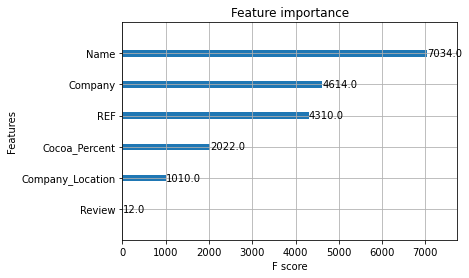

In [11]:
##################################### XGradiant boost ##########################

import xgboost as xgb

xgb_clf = xgb.XGBRegressor(max_depths = 5, n_estimators = 10000, learning_rate = 0.3, n_jobs = -1)

# n_jobs – Number of parallel threads used to run xgboost.
# learning_rate (float) – Boosting learning rate (xgb’s “eta”)


xgb_clf.fit(x_train, y_train)

# Evaluation on Testing Data

# getting error value
print("MSE(Test)-",mean_squared_error(y_test, xgb_clf.predict(x_test)))
# R^2 scuare value
print("R^2(Test)-",r2_score(y_test, xgb_clf.predict(x_test)))

# Evaluation on Training Data

# getting error value
print("MSE(Train)-",mean_squared_error(y_train, xgb_clf.predict(x_train)))
# R^2 scuare value
print("R^2(Train)-",r2_score(y_train, xgb_clf.predict(x_train)))

xgb.plot_importance(xgb_clf);plt.show()   # Plot of the xgb model

# Regressor model not working well and also some of the model are not supporting regressor

>knn -0.407 (0.026)
>cart -0.461 (0.030)
>svm -0.383 (0.027)


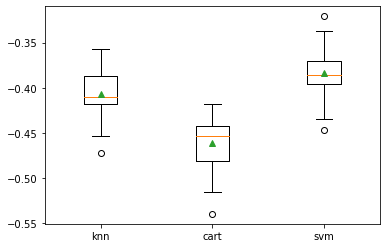

In [12]:
##################################### Stacking ##########################

# compare machine learning models for regression
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from matplotlib import pyplot

X = x_train
y = y_train
# get a list of models to evaluate
def get_models():
	models = dict()
	models['knn'] = KNeighborsRegressor()
	models['cart'] = DecisionTreeRegressor()
	models['svm'] = SVR()
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
	return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [14]:
# make a prediction with a stacking ensemble

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor

# define the base models

level0 = list()
level0.append(('knn', KNeighborsRegressor()))
level0.append(('cart', DecisionTreeRegressor()))
level0.append(('svm', SVR()))

# define meta learner model

level1 = LinearRegression()

# define the stacking ensemble

model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)

# fit the model on all available data

model.fit(X, y)

# make a prediction for one example

yhat = model.predict(x_test)


from sklearn.metrics import mean_squared_error ,r2_score

# Evaluation on Testing Data
# getting error value
print("MSE-Test",mean_squared_error(y_test, yhat))
# R^2 scuare value
print("R^2-Test",r2_score(y_test, yhat))

# Evaluation on Training Data
# getting error value
print("MSE-Train",mean_squared_error(y_train, model.predict(x_train)))
# R^2 scuare value
print("R^2-Train",r2_score(y_train,  model.predict(x_train)))

MSE-Test 0.1945058095126058
R^2-Test 0.06643440951161339
MSE-Train 0.15308234947023192
R^2-Train 0.3440766309085401
